<a href="https://colab.research.google.com/github/uuuuuuume/ume/blob/main/%EA%B3%84%EC%A0%88%EC%97%90_%EB%94%B0%EB%A5%B8_%EC%9D%8C%EC%8B%9D_%EC%84%A0%ED%98%B8%EB%8F%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,899 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123633 files and dire

In [ ]:
from google.colab import files
f=files.upload()

Saving season_temp.csv to season_temp.csv


In [ ]:
f=open('season_temp.csv', 'r', encoding='utf-8')

In [ ]:
# CSV 파일 읽기
import csv
rdr=csv.reader(f)
for line in rdr:
  print(line)

['Year', 'Month', 'Avgmintemp', 'Avgtemp', 'Avgmaxtemp']
['2014', '1', '-0.7', '-4.9', '3.5']
['2014', '2', '1.9', '-1.8', '6.6']
['2014', '3', '7.9', '3.5', '13.1']
['2014', '4', '14', '9.4', '19.6']
['2014', '5', '18.9', '13.8', '25.3']
['2014', '6', '23.1', '19.7', '27.8']
['2014', '7', '26.1', '22.9', '30.6']
['2014', '8', '25.2', '22.1', '29']
['2014', '9', '22.1', '18', '27']
['2014', '10', '15.6', '10.7', '21.4']
['2014', '11', '9', '4.9', '13.8']
['2014', '12', '-2.9', '-6.7', '1.5']
['2015', '1', '-0.9', '-4.8', '3.6']
['2015', '2', '1', '-2.9', '6']
['2015', '3', '6.3', '1', '12.4']
['2015', '4', '13.3', '8.4', '18.8']
['2015', '5', '18.9', '13.6', '24.9']
['2015', '6', '23.6', '18.9', '29.5']
['2015', '7', '25.8', '22.6', '30']
['2015', '8', '26.3', '22.8', '30.8']
['2015', '9', '22.4', '17.5', '28.1']
['2015', '10', '15.5', '10.8', '21.2']
['2015', '11', '8.9', '5.9', '12.7']
['2015', '12', '1.6', '-2.1', '6']
['2016', '1', '-3.2', '-6.8', '1.1']
['2016', '2', '0.2', '-4.1'

In [ ]:
# 통계량으로 이상치 확인
import pandas as pd
df=pd.read_csv('season_temp.csv', index_col='Month', parse_dates=True, encoding='utf-8')
df.describe()

<ipython-input-5-242bf2f4b99a>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('season_temp.csv', index_col='Month', parse_dates=True, encoding='utf-8')


,Year,Avgmintemp,Avgtemp,Avgmaxtemp
count,120.000000,120.000000,120.000000,120.000000
mean,2018.500000,13.414167,9.295000,18.299167
std,2.884324,10.064801,10.254426,9.997970
min,2014.000000,-4.000000,-7.300000,0.100000
25%,2016.000000,4.875000,0.425000,9.850000
50%,2018.500000,14.250000,9.550000,19.850000
75%,2021.000000,22.875000,18.900000,27.625000
max,2023.000000,28.800000,25.200000,33.300000


In [ ]:
import pandas as pd

# CSV 파일에서 데이터를 불러오기
data = pd.read_csv("season_temp.csv")

# 결측치 확인
missing_values = data.isnull().sum()  # 각 열의 결측치 개수
total_missing = missing_values.sum()  # 전체 결측치 개수

print("< 결측치 확인 >")
print(missing_values)

# 계절 정의
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# 'season' 열 추가하여 각 월을 계절로 구분
data['season'] = data['Month'].apply(get_season)

# 계절별로 기온 통계를 계산
season_summary = data.groupby('season').agg({
    'Avgtemp': 'mean',         # 평균 기온의 평균
    'Avgmintemp': 'mean',       # 최저 기온의 평균
    'Avgmaxtemp': 'mean'        # 최고 기온의 평균
}).rename(columns={
    'Avgtemp': 'Average Temp',
    'Avgmintemp': 'Average Min Temp',
    'Avgmaxtemp': 'Average Max Temp'
}).reset_index()

# 계절 순서에 따라 정렬
season_summary = season_summary.set_index('season').reindex(['Spring', 'Summer', 'Autumn', 'Winter']).reset_index()

# 결과 출력
print("\n< 계절별 기온 분포 요약 >")
print(season_summary)

< 결측치 확인 >
Year          0
Month         0
Avgmintemp    0
Avgtemp       0
Avgmaxtemp    0
dtype: int64

< 계절별 기온 분포 요약 >
   season  Average Temp  Average Min Temp  Average Max Temp
0  Spring      8.443333         13.313333         18.976667
1  Summer     22.053333         25.473333         29.766667
2  Autumn     11.006667         15.200000         20.186667
3  Winter     -4.323333         -0.330000          4.266667


In [ ]:
# 계절별 선호 음식 가상 데이터셋 생성
menu_data = pd.DataFrame({
    'Season': ['Spring', 'Summer', 'Autumn', 'Winter'],
    'Popular_Menus': [
        ['산낙지', '홍어', '주꾸미', '꼬막', '간장게장', '불고기/갈빗살/차돌박이', '돼지갈비/갈매기살', '비빔밥', '지중해 음식'],
        ['콩국수', '수박', '수제비', '냉모밀', '팥빙수', '백숙', '삼계탕', '닭죽', '치킨', '장어구이/곰장어', '전복', '오리요리', '냉면', '아이스크림'],
        ['전어', '대하', '뼈찜', '생새우', '과메기', '대방어', '석화', '굴보쌈', '수육', '맥주/호프', '브런치 음식'],
         ['팥죽', '케이크', '군고구마', '와인', '만두전골', '떡국', '딸기', '회', '해물탕/꽃게', '해산물', '사케', '칵테일']
    ]
})
display(menu_data)

,Season,Popular_Menus
0,Spring,"[산낙지, 홍어, 주꾸미, 꼬막, 간장게장, 불고기/갈빗살/차돌박이, 돼지갈비/갈매..."
1,Summer,"[콩국수, 수박, 수제비, 냉모밀, 팥빙수, 백숙, 삼계탕, 닭죽, 치킨, 장어구이..."
2,Autumn,"[전어, 대하, 뼈찜, 생새우, 과메기, 대방어, 석화, 굴보쌈, 수육, 맥주/호프..."
3,Winter,"[팥죽, 케이크, 군고구마, 와인, 만두전골, 떡국, 딸기, 회, 해물탕/꽃게, 해..."


In [ ]:
import pandas as pd

# 음식 선호도 데이터 요약
menu_data = pd.DataFrame({
    'Season': ['Spring', 'Summer', 'Autumn', 'Winter'],
    'Popular_Menus': [
        ['산낙지', '홍어', '주꾸미', '꼬막', '간장게장', '불고기/갈빗살/차돌박이', '돼지갈비/갈매기살', '비빔밥', '지중해 음식'],  # Spring
        ['콩국수', '수박', '수제비', '냉모밀', '팥빙수', '백숙', '삼계탕', '닭죽', '치킨', '장어구이/곰장어', '전복', '오리요리', '냉면', '아이스크림'],  # Summer
        ['전어', '대하', '뼈찜', '생새우', '과메기', '대방어', '석화', '굴보쌈', '수육', '맥주/호프', '브런치 음식'],  # Autumn
        ['팥죽', '케이크', '군고구마', '와인', '만두전골', '떡국', '딸기', '회', '해물탕/꽃게', '해산물', '사케', '칵테일']  # Winter
    ],
    'Preference_Ratio': [
        [31.5, 29.2, 27.9, 26.1, 26.0, 29.8, 29.5, 29.6, 30.2],  # Spring
        [38.8, 43.0, 37.1, 42.8, 41.8, 40.6, 47.0, 36.5, 35.2, 37.8, 37.5, 36.6, 42.8, 41.2],  # Summer
        [33.2, 27.7, 32.0, 29.4, 31.4, 30.8, 26.4, 34.7, 37.9, 34.1, 27.7],  # Autumn
        [22.4, 18.3, 26.8, 21.3, 29.2, 31.9, 30.7, 31.2, 32.6, 23.3, 24.2, 24.0]  # Winter
    ]
})

# 각 계절별 상위 3개의 음식과 선호도 요약
for index, row in menu_data.iterrows():
    season = row['Season']
    menus = row['Popular_Menus']
    preferences = row['Preference_Ratio']

    # 선호도에 따라 상위 3개 음식 선택
    top3_indices = sorted(range(len(preferences)), key=lambda i: preferences[i], reverse=True)[:3]
    top3_menus = [(menus[i], preferences[i]) for i in top3_indices]

    # 출력
    print(f"\n{season}에 가장 선호되는 음식 Top 3:")
    for menu, preference in top3_menus:
        print(f"  - {menu}: {preference}%")


Spring에 가장 선호되는 음식 Top 3:
  - 산낙지: 31.5%
  - 지중해 음식: 30.2%
  - 불고기/갈빗살/차돌박이: 29.8%

Summer에 가장 선호되는 음식 Top 3:
  - 삼계탕: 47.0%
  - 수박: 43.0%
  - 냉모밀: 42.8%

Autumn에 가장 선호되는 음식 Top 3:
  - 수육: 37.9%
  - 굴보쌈: 34.7%
  - 맥주/호프: 34.1%

Winter에 가장 선호되는 음식 Top 3:
  - 해물탕/꽃게: 32.6%
  - 떡국: 31.9%
  - 회: 31.2%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# 한글 폰트 설정
rcParams['font.family'] = 'NanumGothic'
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리: 계절별 음식과 선호도를 하나의 데이터프레임으로 변환
menu_expanded = []
for i, row in menu_data.iterrows():
    season = row['Season']
    menus = row['Popular_Menus']
    preferences = row['Preference_Ratio']
    for menu, pref in zip(menus, preferences):
        menu_expanded.append({'Season': season, 'Menu': menu, 'Preference': pref})

menu_df = pd.DataFrame(menu_expanded)

# 예시 기온 데이터 (계절별 평균 기온)
season_temp_data = pd.DataFrame({
    'Season': ['Spring', 'Summer', 'Autumn', 'Winter'],
    'Avg_Temp': [15, 25, 10, 0]  # 각 계절의 평균 기온 예시
})

<ipython-input-14-1c49ae51cb5b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='Preference', hue='Menu', data=menu_df, ci=None)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/di

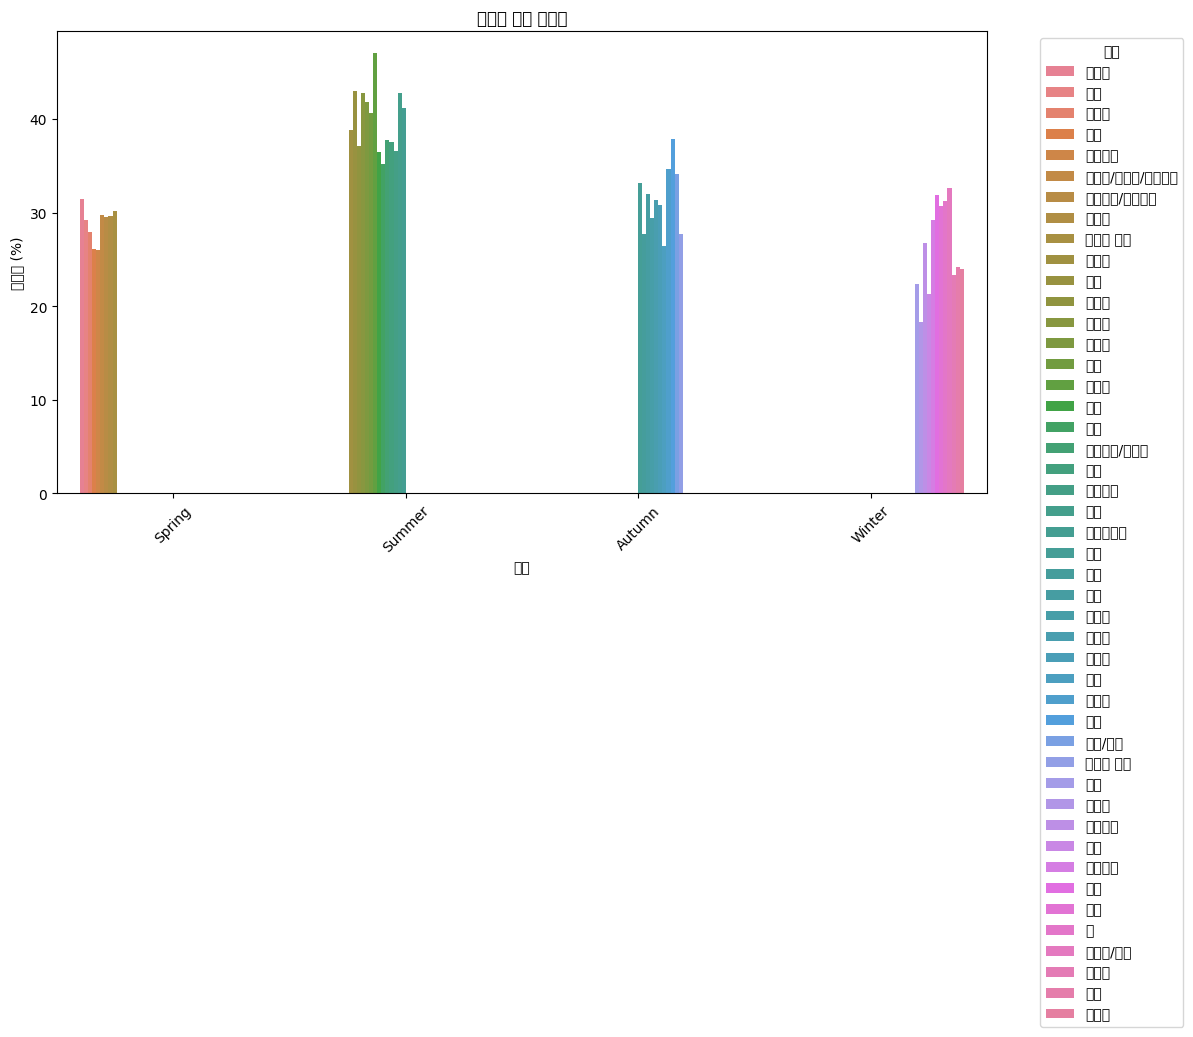

In [ ]:
# 계절별 음식 선호도 막대그래프
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Preference', hue='Menu', data=menu_df, ci=None)
plt.title('계절별 음식 선호도')
plt.ylabel('선호도 (%)')
plt.xlabel('계절')
plt.legend(title='음식', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

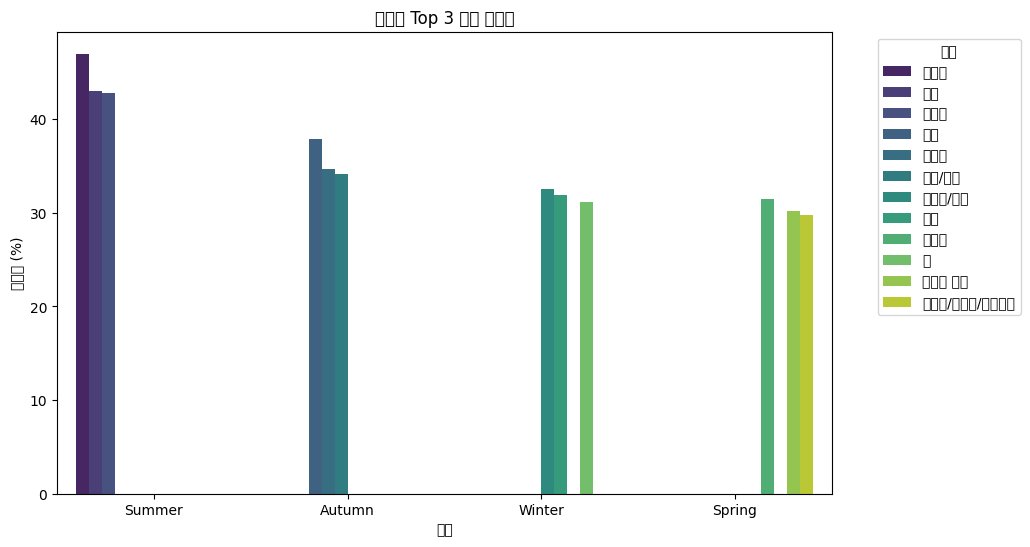

In [ ]:
# 계절별 Top 3
top3_data = menu_df.sort_values(by='Preference', ascending=False).groupby('Season').head(3)


# 막대그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=top3_data, x='Season', y='Preference', hue='Menu', palette='viridis')
plt.title("계절별 Top 3 음식 선호도")
plt.ylabel("선호도 (%)")
plt.xlabel("계절")
plt.legend(title="음식", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# 계절별 인사이트 생성
insights = {
    'Spring': "봄철에는 날씨가 따뜻해지면서 해산물, 채소, 그리고 가벼운 육류 요리가 인기를 끕니다. 신선하고 산뜻한 메뉴를 추천합니다.",
    'Summer': "여름철에는 더운 날씨로 인해 차가운 음식과 시원한 음료가 선호됩니다. 냉면, 콩국수, 팥빙수와 같은 시원한 메뉴를 강조하는 것이 좋습니다.",
    'Autumn': "가을철은 해산물의 제철로, 전어, 대하와 같은 해산물 요리가 인기를 끕니다. 또한, 가을 축제 분위기를 반영한 수육, 전 등과 같은 음식도 추천합니다.",
    'Winter': "겨울철에는 추운 날씨로 인해 따뜻한 국물 요리와 영양가 있는 음식이 선호됩니다. 해물탕, 떡국, 전골 요리 등을 강조하면 효과적입니다."
}

# 인사이트 출력
print("< 배달업체를 위한 계절별 전략적 인사이트 >")
for season, insight in insights.items():
    print(f"\n- {season}: {insight}")

< 배달업체를 위한 계절별 전략적 인사이트 >

- Spring: 봄철에는 날씨가 따뜻해지면서 해산물, 채소, 그리고 가벼운 육류 요리가 인기를 끕니다. 신선하고 산뜻한 메뉴를 추천합니다.

- Summer: 여름철에는 더운 날씨로 인해 차가운 음식과 시원한 음료가 선호됩니다. 냉면, 콩국수, 팥빙수와 같은 시원한 메뉴를 강조하는 것이 좋습니다.

- Autumn: 가을철은 해산물의 제철로, 전어, 대하와 같은 해산물 요리가 인기를 끕니다. 또한, 가을 축제 분위기를 반영한 수육, 전 등과 같은 음식도 추천합니다.

- Winter: 겨울철에는 추운 날씨로 인해 따뜻한 국물 요리와 영양가 있는 음식이 선호됩니다. 해물탕, 떡국, 전골 요리 등을 강조하면 효과적입니다.
